In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

### GOAL:

Modify the PLSR model given random data by adjusting the number of components to put into the model.

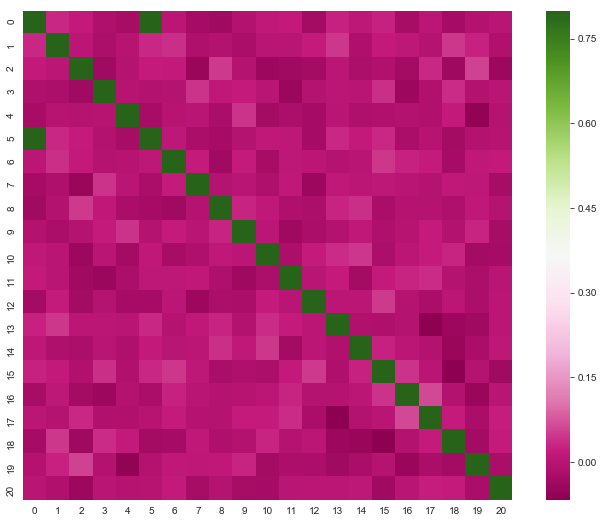

In [19]:
# Curriculum had n = 1000 and p = 10. I'm gonna adjust starting conditions
n = 2000

# Number of features.
p = 20

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# The below equation is used to play around with correlations between features

y = (X[:, 0] + 5) * X[:, 4] + np.random.normal(size=n * 1) + 5
# originally it was X[0] and x[1]. I'm playing around with it.


# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap='PiYG')
plt.show()

R-squared regression: 0.926482486503201
R-squared PLSR: 0.9264824865030213


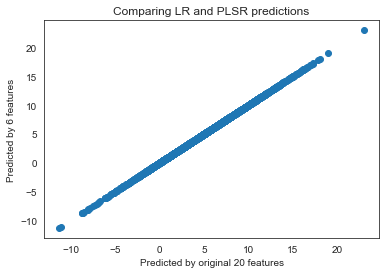

In [21]:
# maybe the first six (?!) features are correlated?

# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))#LR R^2 score value

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 6 dimensions.
pls1 = PLSRegression(n_components=6)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y)) #PLSR R^2 score value

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 20 features')
plt.ylabel('Predicted by 6 features')
plt.title('Comparing LR and PLSR predictions')

plt.show() # almost identical!

R-squared regression: 0.926482486503201
R-squared PLSR: 0.9264820937060061


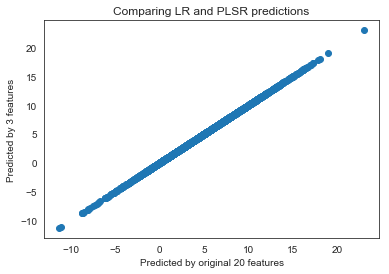

In [24]:
# trying that again but with only 3 features

regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))#LR R^2 score value

# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y)) #PLSR R^2 score value

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 20 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')

plt.show() # pretty damn close!

R-squared regression: 0.926482486503201
R-squared PLSR: 0.9192485772227883


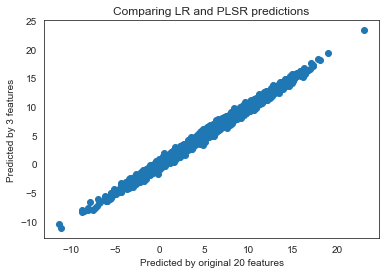

In [25]:
# iterating with using only 1 feature...

regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))#LR R^2 score value

# Reduce feature space to 1 dimensions.
pls1 = PLSRegression(n_components=1)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y)) #PLSR R^2 score value

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 20 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')

plt.show() # pretty damn close!

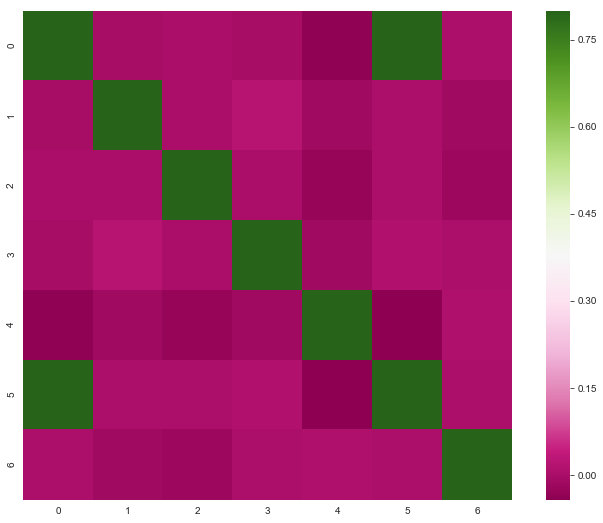

In [26]:
# still freakin accurate!
#Now to adjust feature space down to 6 overall

# Curriculum had n = 1000 and p = 10. I'm gonna adjust starting conditions
n = 2000

# Number of features.
p = 6

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# The below equation is used to play around with correlations between features

y = (X[:, 0] + 5) * X[:, 4] + np.random.normal(size=n * 1) + 5
# originally it was X[0] and x[1]. I'm playing around with it.


# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap='PiYG')
plt.show()

R-squared regression: 0.926502440708115
R-squared PLSR: 0.926502440080556


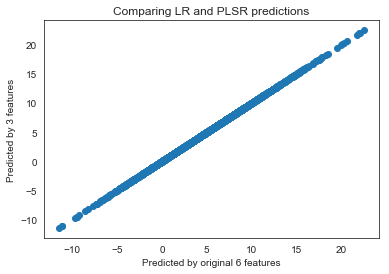

In [28]:
# iterating with using only 3 features...

regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))#LR R^2 score value

pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y)) #PLSR R^2 score value

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 6 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')

plt.show() # pretty damn close!

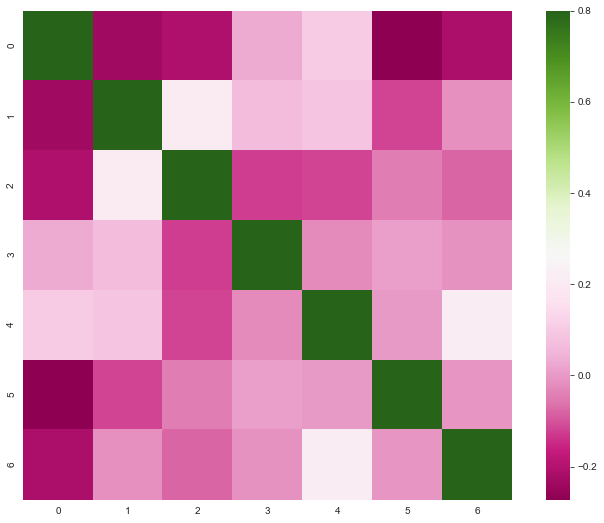

In [34]:
# so it appears that the number of datapoints is the 
# controlling factor to work with

# dialing it down to...
n = 75

# Number of features.
p = 6

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# The below equation is used to play around with correlations between features

y = (X[:, 0]) * X[:, 2] + np.random.normal(size=n * 1) + 5
# originally it was X[0] and x[1]. I'm playing around with it.


# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap='PiYG')
plt.show()

R-squared regression: 0.25321481433790183
R-squared PLSR: 0.25284104186943257


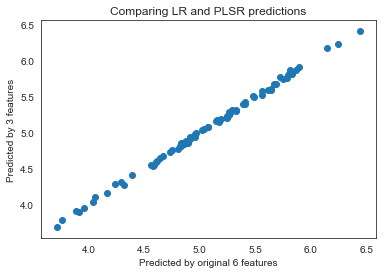

In [35]:
# iterating with using only 3 features...

regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))#LR R^2 score value

pls1 = PLSRegression(n_components=2)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y)) #PLSR R^2 score value

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 6 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')

plt.show() # pretty damn close!

In [ ]:
# overall: PLSR is pretty accurate so long as there is a correlation
# between features

# reducing the noise (the + x in the y variable) significantly adds
# correlation between the variables, making the specific correlation between
# the PLSR variables not as specific in comparison.